In [1]:
import os
import ipyplot

from RanDepict import RandomDepictor, RandomMarkushStructureCreator

## Depict chemical structures with CDK, RDKit or Indigo

After calling an instance of RandomDepictor, depictions with randomly chosen parameters are created by calling the functions

- depict_and_resize_cdk(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_rdkit(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_indigo(
      smiles: str, 
      image_shape: Tuple[int,int]
  )
- depict_and_resize_pikachu(
      smiles: str, 
      image_shape: Tuple[int,int]
  )


The SMILES string needs to be given, the image shape defaults to (299,299,3).

Each of these functions returns an np.array which represents an RGB image of the chemical structure.

_________________CDK depictions_________________



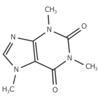
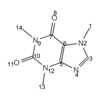
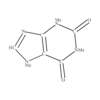
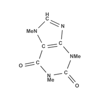
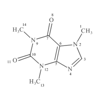
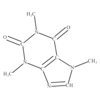
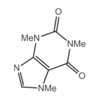
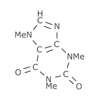
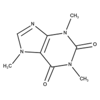
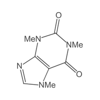


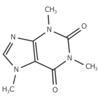
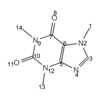
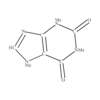
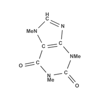
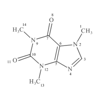
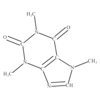
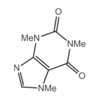
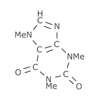
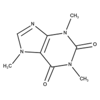
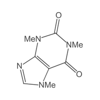

_________________RDKit depictions_________________



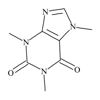
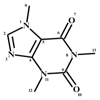
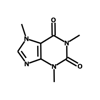
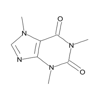
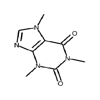
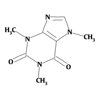
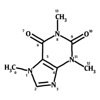
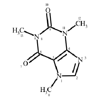
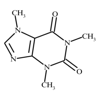
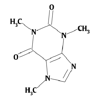


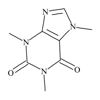
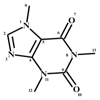
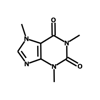
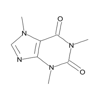
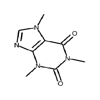
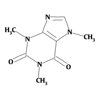
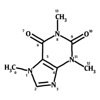
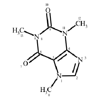
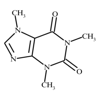
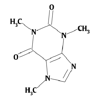

_________________Indigo depictions_________________



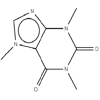
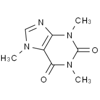
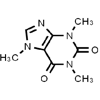
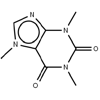
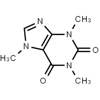
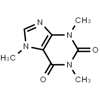
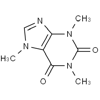
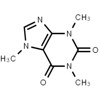
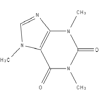
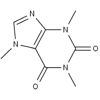


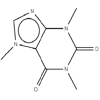
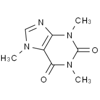
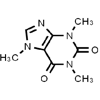
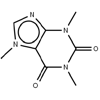
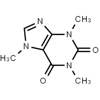
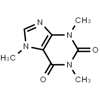
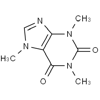
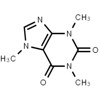
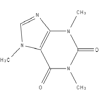
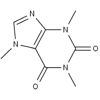

_________________PIKAChU depictions_________________



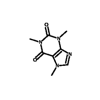
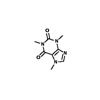
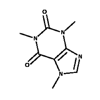
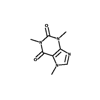
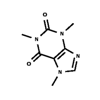
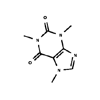
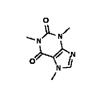
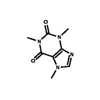
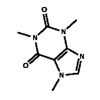
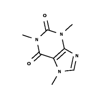


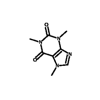
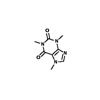
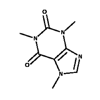
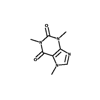
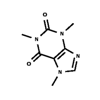
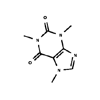
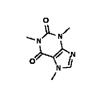
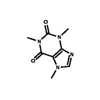
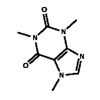
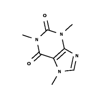

In [2]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
depiction_img_shape = (299,299)

# random_depictor can be called with a seed for reproducible results (defaults to 42)
with RandomDepictor(seed = 10) as depictor:
    # CDK depictions
    cdk_images = []
    for _ in range(10):
        cdk_images.append(depictor.depict_and_resize_cdk(smiles, depiction_img_shape))
    print("_________________CDK depictions_________________")
    ipyplot.plot_images(cdk_images, max_images=10, img_width=100)
    
    # RDKit Depictions
    rdkit_images = []
    for _ in range(10):
        rdkit_images.append(depictor.depict_and_resize_rdkit(smiles, depiction_img_shape))
    print("_________________RDKit depictions_________________")
    ipyplot.plot_images(rdkit_images, max_images=10, img_width=100)
    
    # Indigo Depictions
    indigo_images = []
    for _ in range(10):
        indigo_images.append(depictor.depict_and_resize_indigo(smiles, depiction_img_shape))
    print("_________________Indigo depictions_________________")
    ipyplot.plot_images(indigo_images, max_images=10, img_width=100)
    
    # PIKAChU Depictions
    pikachu_images = []
    for _ in range(10):
        pikachu_images.append(depictor.depict_and_resize_pikachu(smiles, depiction_img_shape))
    print("_________________PIKAChU depictions_________________")
    ipyplot.plot_images(pikachu_images, max_images=10, img_width=100)

## Depict chemical structures with a random toolkit

After calling an instance of RandomDepictor, the function
 
 - random_depiction(
       smiles: str, 
       image_shape: Tuple[int,int]
   )
 
The SMILES string needs to be given, the image_shape defaults to (299,299).

It returns an np.array which represents an RGB image of the chemical structure.

**Markush structures can be handled by the random_depiction() method. As not all of the used toolkits handle every type of markush structure equally well, we recommend using random_depiction as it filters the potential toolkits used for the depiction based on the input SMILES.**

Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0
Warning! Rogue electron.
R1_0



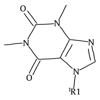
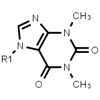
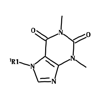
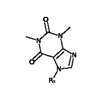
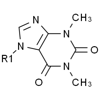
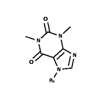
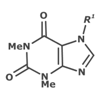
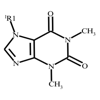
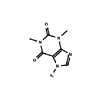
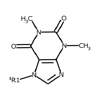
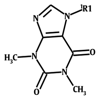
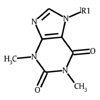
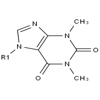
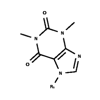
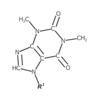
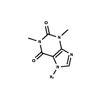
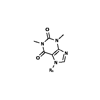
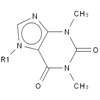
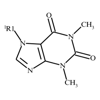
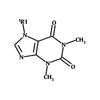


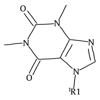
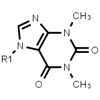
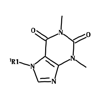
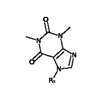
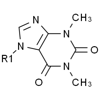
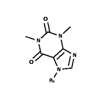
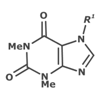
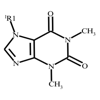
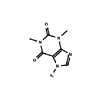
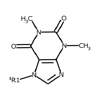
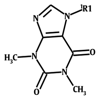
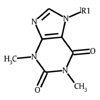
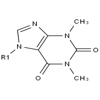
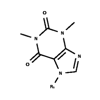
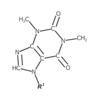
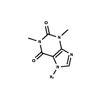
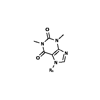
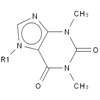
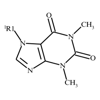
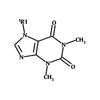

In [3]:
smiles = "[R1]N1C=NC2=C1C(=O)N(C(=O)N2C)C"

with RandomDepictor(42) as depictor:
    random_images = []
    for _ in range(20):
        random_images.append(depictor.random_depiction(smiles))

ipyplot.plot_images(random_images, max_images=20, img_width=100)

## Create random depictions with random augmentations

After calling an instance of RandomDepictor, this instance can simply be called as a function in order to generate a chemical structure depiction using CDK, RDKit or Indigo (randomly chosen) and apply random augmentations. The augmentations consist of random imgaug augmentations and randomly added chemical ID labels or curved arrows


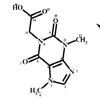
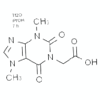
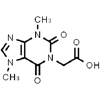
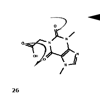
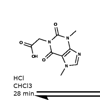
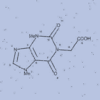
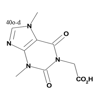
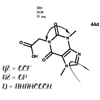
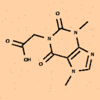
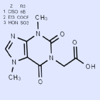
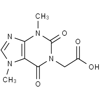
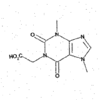
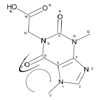
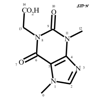
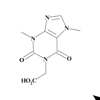
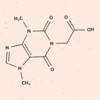
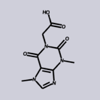
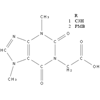
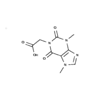
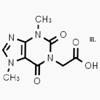


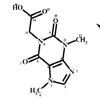
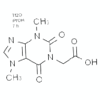
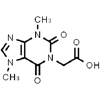
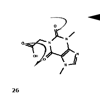
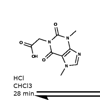
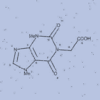
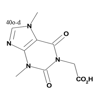
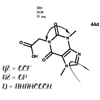
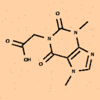
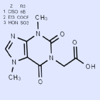
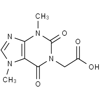
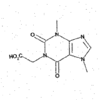
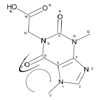
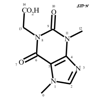
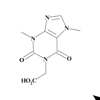
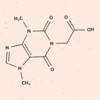
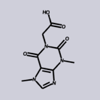
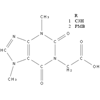
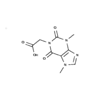
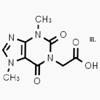

In [4]:
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor() as depictor:
    random_augmented_images = []
    for _ in range(20):
        random_augmented_images.append(depictor(smiles))
        

ipyplot.plot_images(random_augmented_images, max_images=20, img_width=100)

## 

## Create and save a batch of images

After calling an instance of RandomDepictor, simply call the method depict_save().

Args:

- smiles_list (List[str]): List of SMILES str
- images_per_structure (int): Amount of images to create per SMILES str
- output_dir (str): Output directory 
- augment (bool): Boolean that indicates whether or not to use augmentations
- ID_list (List[str]): List of IDs (should be as long as smiles_list)
- shape (Tuple[int, int], optional): image shape. Defaults to (299, 299).
- processes (int, optional): Number of parallel threads. Defaults to 4.
- seed (int, optional): Seed for pseudo-random decisions. Defaults to 42.

In [5]:
# Make sure the output directories exist
if not os.path.exists('not_augmented'):
        os.mkdir('not_augmented')
        
if not os.path.exists('augmented'):
        os.mkdir('augmented')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save([smiles], 20, 'not_augmented', False, ['caffeine'], (299, 299), 5)
    depictor.batch_depict_save([smiles], 20, 'augmented', True, ['caffeine'], (299, 299), 5)

## Create a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.3
- cdk_proportion: float = 0.55
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42

* Note: Have a look at examples/generate_depiction_grids_with_fingerprints.py to see how this function was used to generate the grid figures from our publication.


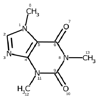
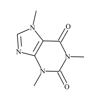
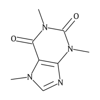
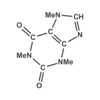
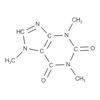
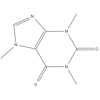
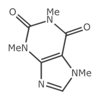
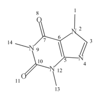
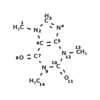
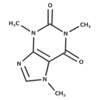
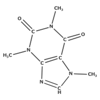
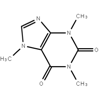
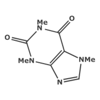
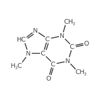
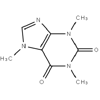
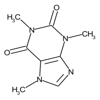
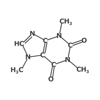
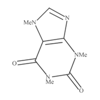
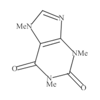
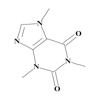
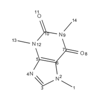
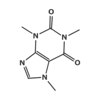
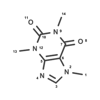
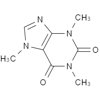
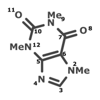
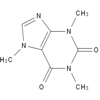
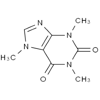
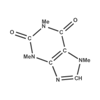
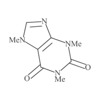
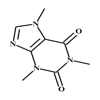
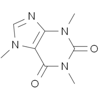
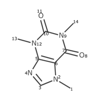
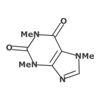
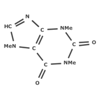
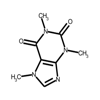
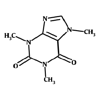
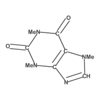
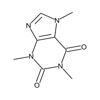
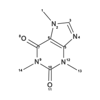
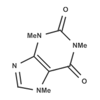
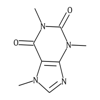
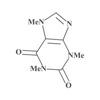
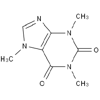
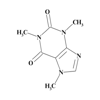
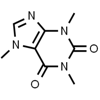
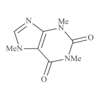
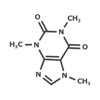
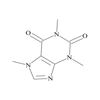
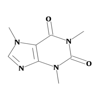
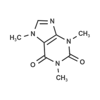
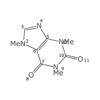
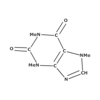
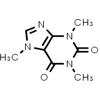
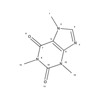
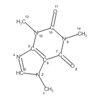
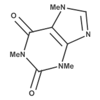
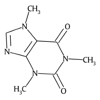
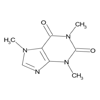
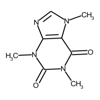
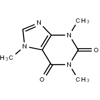
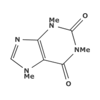
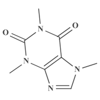
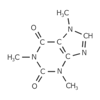
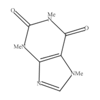
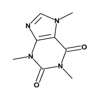
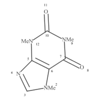
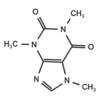
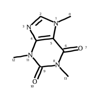
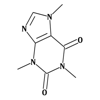
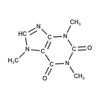
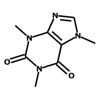
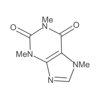
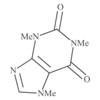
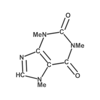
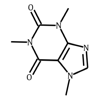
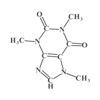
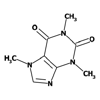
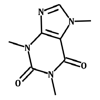
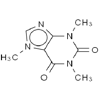
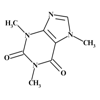
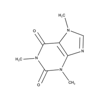
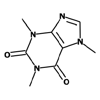
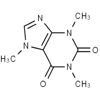
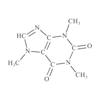
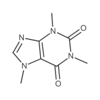
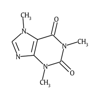
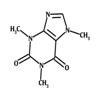
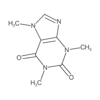
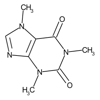
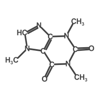
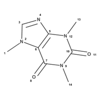
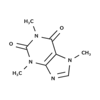
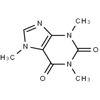
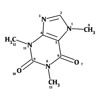
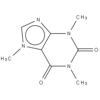
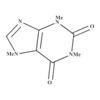
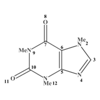
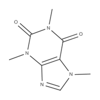
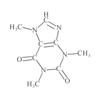
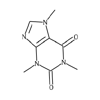


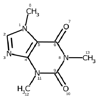
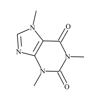
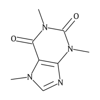
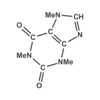
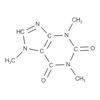
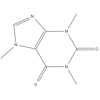
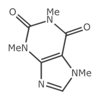
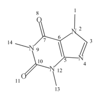
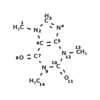
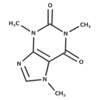
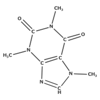
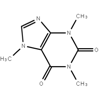
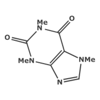
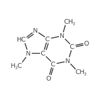
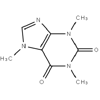
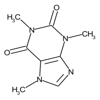
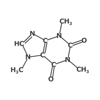
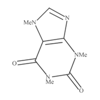
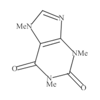
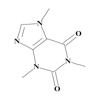
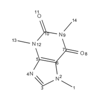
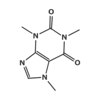
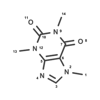
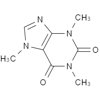
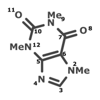
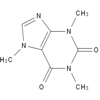
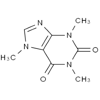
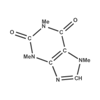
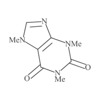
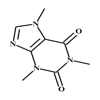
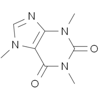
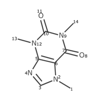
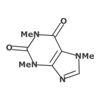
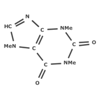
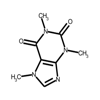
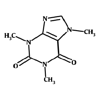
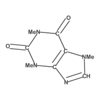
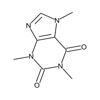
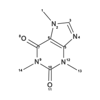
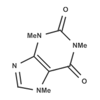
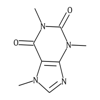
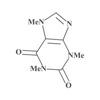
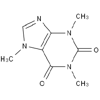
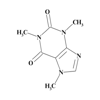
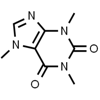
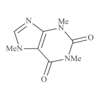
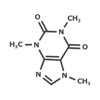
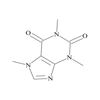
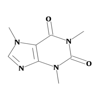
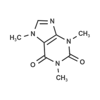
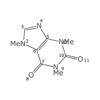
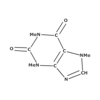
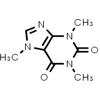
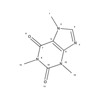
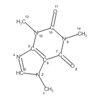
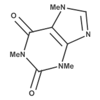
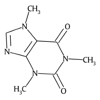
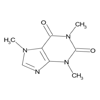
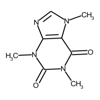
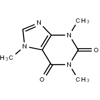
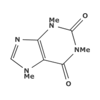
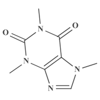
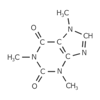
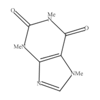
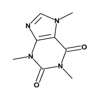
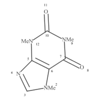
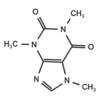
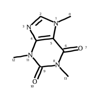
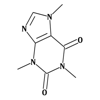
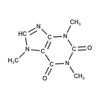
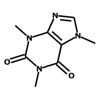
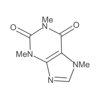
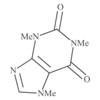
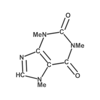
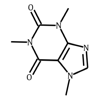
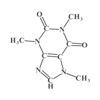
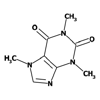
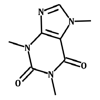
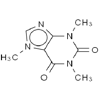
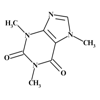
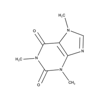
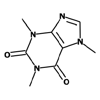
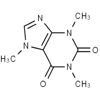
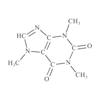
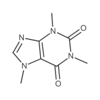
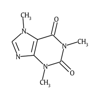
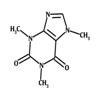
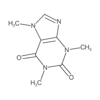
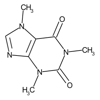
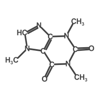
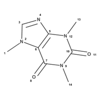
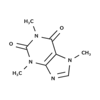
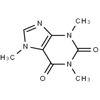
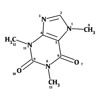
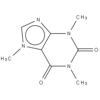
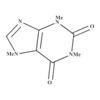
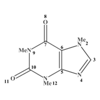
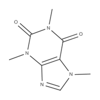
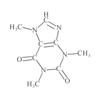
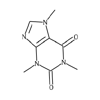


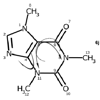
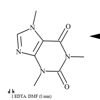
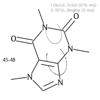
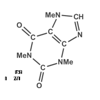
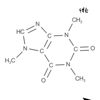
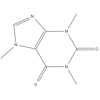
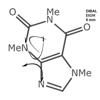
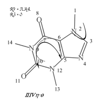
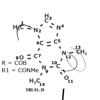
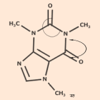
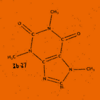
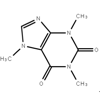
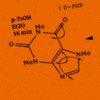
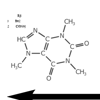
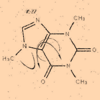
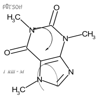
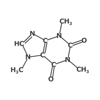
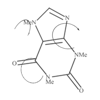
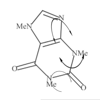
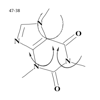
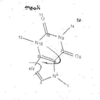
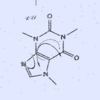
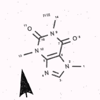
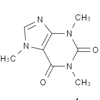
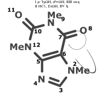
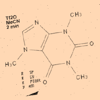
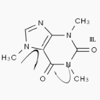
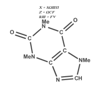
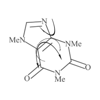
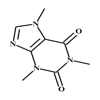
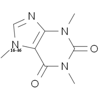
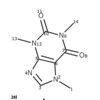
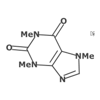
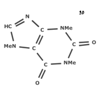
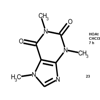
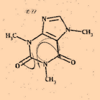
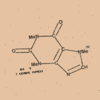
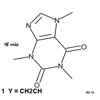
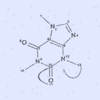
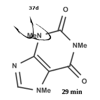
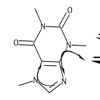
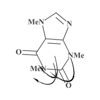
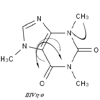
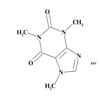
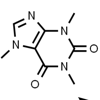
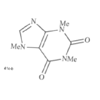
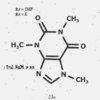
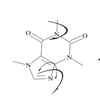
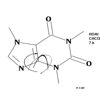
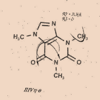
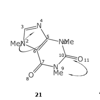
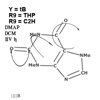
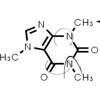
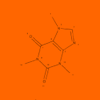
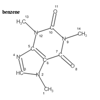
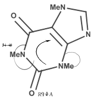
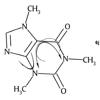
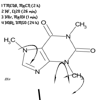
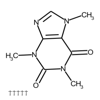
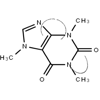
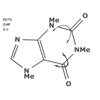
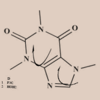
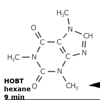
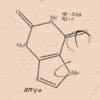
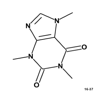
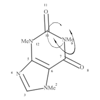
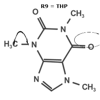
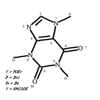
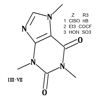
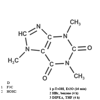
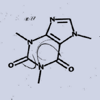
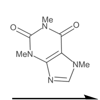
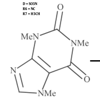
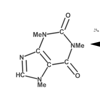
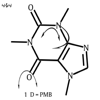
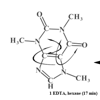
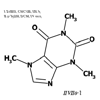
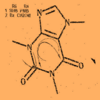
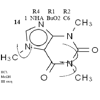
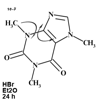
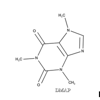
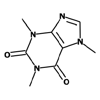
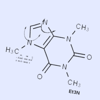
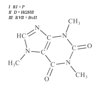
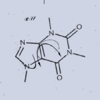
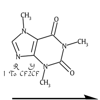
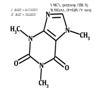
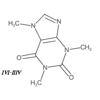
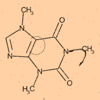
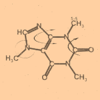
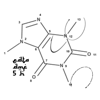
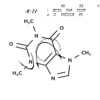
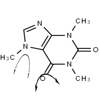
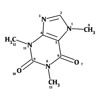
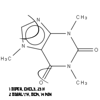
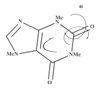
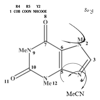
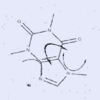
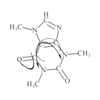
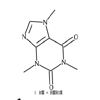


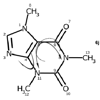
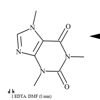
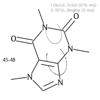
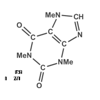
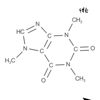
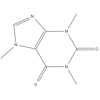
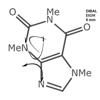
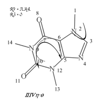
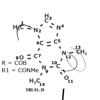
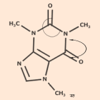
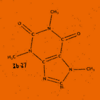
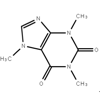
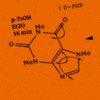
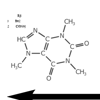
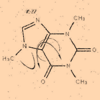
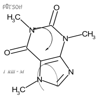
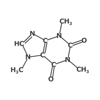
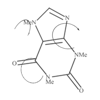
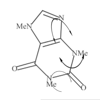
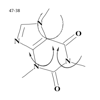
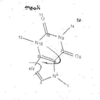
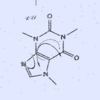
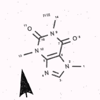
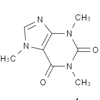
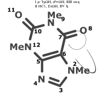
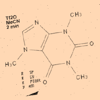
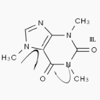
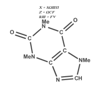
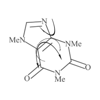
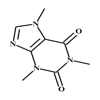
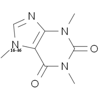
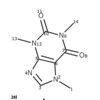
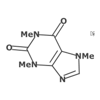
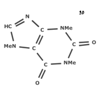
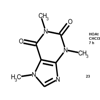
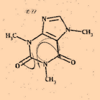
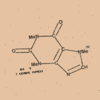
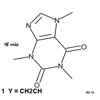
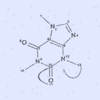
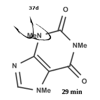
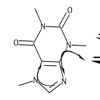
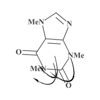
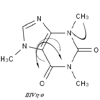
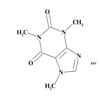
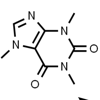
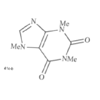
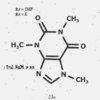
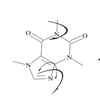
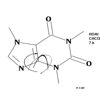
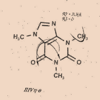
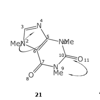
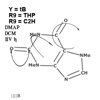
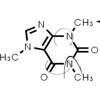
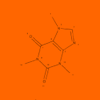
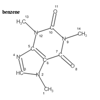
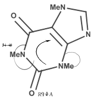
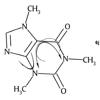
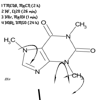
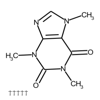
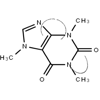
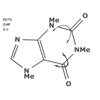
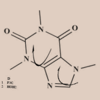
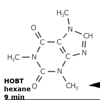
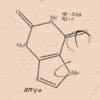
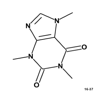
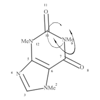
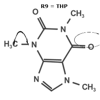
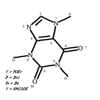
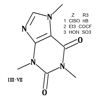
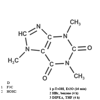
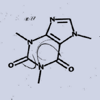
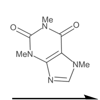
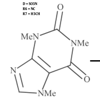
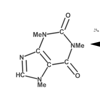
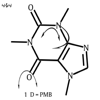
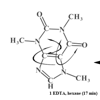
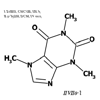
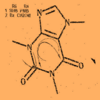
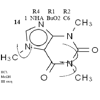
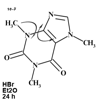
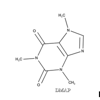
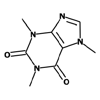
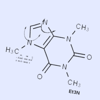
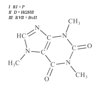
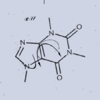
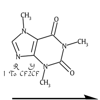
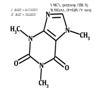
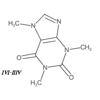
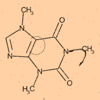
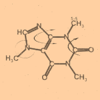
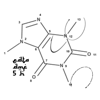
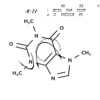
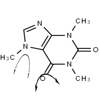
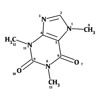
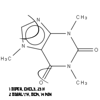
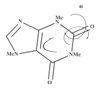
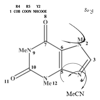
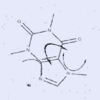
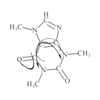
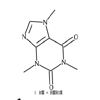

In [6]:
# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

with RandomDepictor(42) as depictor:
    fp_depictions = depictor.batch_depict_with_fingerprints([smiles],
                                                         100,
                                                         aug_proportion = 0)
    fp_aug_depictions = depictor.batch_depict_with_fingerprints([smiles],
                                                         100,
                                                         aug_proportion = 1)
ipyplot.plot_images(fp_depictions, max_images=100, img_width=100)
ipyplot.plot_images(fp_aug_depictions, max_images=100, img_width=100)

## Create and save a batch of images while ensuring diversity using feature fingerprints


After calling an instance of RandomDepictor, simply call the method batch_depict_save_with_fingerprints().

Args:

- smiles_list: List[str]
- images_per_structure: int
- output_dir: str
- ID_list: List[str]
- indigo_proportion: float = 0.15
- rdkit_proportion: float = 0.3
- cdk_proportion: float = 0.55
- aug_proportion: float = 0.5
- shape: Tuple[int, int] = (299, 299)
- processes: int = 4
- seed: int = 42


*Note: The images that are created here, were used for the animations in the GitHub repository

In [7]:
# Make sure the output directories exist
if not os.path.exists('not_augmented_fingerprint'):
        os.mkdir('not_augmented_fingerprint')
        
if not os.path.exists('augmented_fingerprint'):
        os.mkdir('augmented_fingerprint')

# Depict and save two batches of images
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)CC(=O)O"
with RandomDepictor(42) as depictor:
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'not_augmented_fingerprint',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 0)
    depictor.batch_depict_save_with_fingerprints([smiles], 
                                                 100, 
                                                 'augmented_fingerprint',
                                                ['caffeine_{}'.format(n) for n in range(100)],
                                                aug_proportion = 1)

## Artificial generation of SMILES that represent markush structures

Generate markush structures based on list of SMILES strings

In [3]:
markush_generator = RandomMarkushStructureCreator()
input_smiles = ['CCC', 'C1=CC=CC=C1C(=O)', 'C1CCCCC1']
markush_smiles = markush_generator.generate_markush_structure_dataset(input_smiles)
markush_smiles

['CC(C)[R]',
 'C1=C[R](=[R]([X15])[X13]([H])=C1)C=O',
 'C1CC(C(CC1[R10])[Z14])[R4]']

Depict the markush structures using RanDepict

Warning! Rogue electron.
R10_6
Warning! Rogue electron.
Z14_7
Warning! Rogue electron.
R4_8
Warning! Rogue electron.
R10_6
Warning! Rogue electron.
Z14_7
Warning! Rogue electron.
R4_8



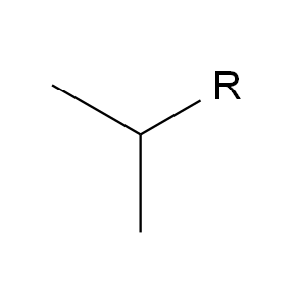
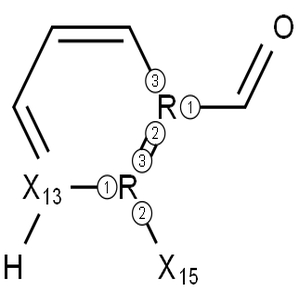
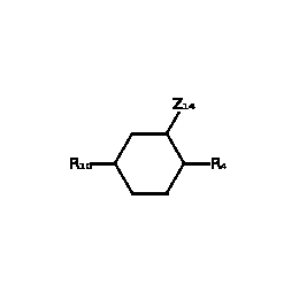


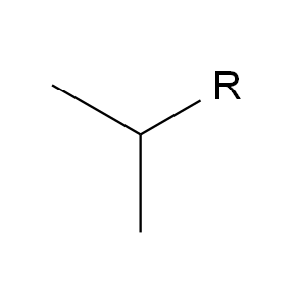
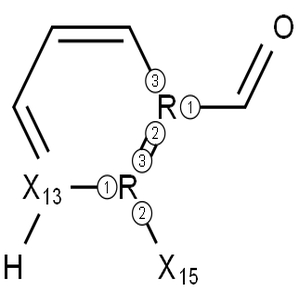
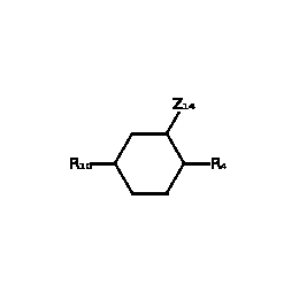

In [5]:
with RandomDepictor() as depictor:
    markush_depictions = [depictor.random_depiction(smi)
                          for smi in markush_smiles]
ipyplot.plot_images(markush_depictions, max_images=100, img_width=299)